                  Open        High         Low       Close
Date                                                      
2022-01-03  177.830002  182.880005  177.710007  182.009995
2022-01-04  182.630005  182.940002  179.119995  179.699997
2022-01-05  179.610001  180.169998  174.639999  174.919998
2022-01-06  172.699997  175.300003  171.639999  172.000000
2022-01-07  172.889999  174.139999  171.029999  172.169998


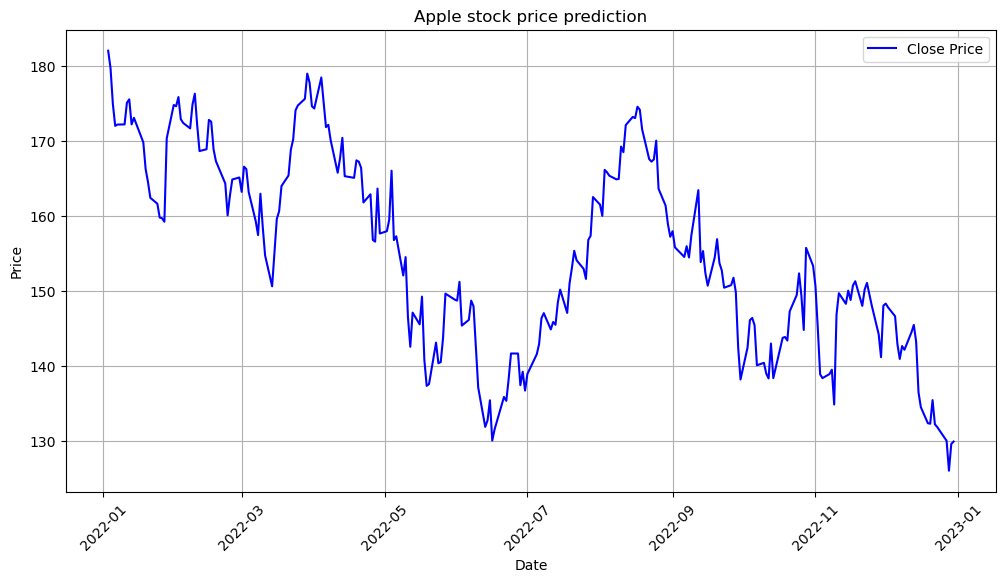

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv("Documents/学習データApple2022.csv", parse_dates=['Date'], index_col='Date')

# 最初の数行を表示してデータの構造を確認
print(data.head())

# データの可視化
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='b', label='Close Price')
plt.title('Apple stock price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

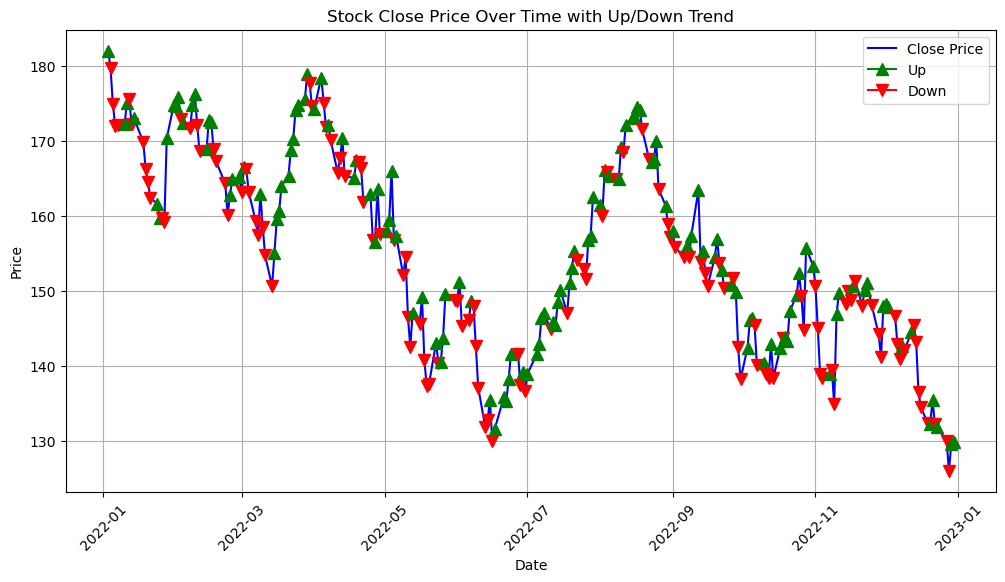

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv("Documents/学習データApple2022.csv", parse_dates=['Date'], index_col='Date')

# 終値と始値の差を計算
data['Price Change'] = data['Close'] - data['Open']

# upかdownかを示すラベルを付ける
data['Trend'] = data['Price Change'].apply(lambda x: 'up' if x >= 0 else 'down')

# グラフの作成
plt.figure(figsize=(12, 6))

# 終値のプロット
plt.plot(data.index, data['Close'], color='b', label='Close Price')

# upとdownを表示する
for index, row in data.iterrows():
    if row['Trend'] == 'up':
        plt.plot(index, row['Close'], marker='^', markersize=8, color='g')
    else:
        plt.plot(index, row['Close'], marker='v', markersize=8, color='r')

# グラフの設定
plt.title('Stock Close Price Over Time with Up/Down Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(['Close Price', 'Up', 'Down'])
plt.grid(True)

# グラフの表示
plt.show()

In [9]:
# 短期移動平均（20日）
df['SMA_20'] = df['Close'].rolling(window=20).mean()

# 長期移動平均（50日）
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# 移動平均と実際の株価をプロット
plt.figure(figsize=(14, 7))#プロットのサイズを指定
plt.plot(df['Close'], label='Actual Close Price')
plt.plot(df['SMA_20'], label='20-Day SMA', alpha=0.7)#20日移動平均をプロット、alpha=0.7 は透明度を指定
plt.plot(df['SMA_50'], label='50-Day SMA', alpha=0.7)
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

NameError: name 'df' is not defined

In [ ]:
# 移動平均を使った予測（20日移動平均）
df['Prediction'] = df['SMA_20'].shift(-1)

# データをプロット
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Actual Close Price')
plt.plot(df['Prediction'], label='Prediction', linestyle='--')
plt.title('Stock Price Prediction using 20-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error


# シンプルな予測モデルの実装
# 予測値と実際の値の対応を取るためにNaNを削除
df = df.dropna(subset=['Prediction'])

# 実際の値と予測値
actual = df['Close']
predicted = df['Prediction']

# MSE（平均二乗誤差）を計算
mse = mean_squared_error(actual, predicted)
print(f'Mean Squared Error: {mse:.2f}')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# データの読み込み
df = pd.read_csv('japan_data.csv', index_col='Date', parse_dates=True)

# 短期移動平均（20日）長期移動平均（50日）
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

df_2022 = df.loc['2022']

# 移動平均と実際の株価をプロット
plt.figure(figsize=(14, 7))
plt.plot(df_2022['Close'], label='Actual Close Price')
plt.plot(df_2022['SMA_20'], label='20-Day SMA', alpha=0.7)
plt.plot(df_2022['SMA_50'], label='50-Day SMA', alpha=0.7)
plt.title('Stock Price and Moving Averages for 2022')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [ ]:
# 2022年のデータに限定
df_2022 = df.loc['2022'].copy()

# 2022年のデータに対して20日移動平均を1日先にシフトさせた予測値を計算
df_2022['Prediction'] = df_2022['SMA_20'].shift(-1)

# 予測値と実際の値の対応を取るためにNaNを削除
df_2022 = df_2022.dropna(subset=['Prediction'])

# 実際の値と予測値
actual_2022 = df_2022['Close']
predicted_2022 = df_2022['Prediction']

# MSE（平均二乗誤差）を計算
mse_2022 = mean_squared_error(actual_2022, predicted_2022)
print(f'Mean Squared Error for 2022: {mse_2022:.2f}')

# データをプロット
plt.figure(figsize=(14, 7))
plt.plot(df_2022['Close'], label='Actual Close Price')
plt.plot(df_2022['Prediction'], label='Prediction', linestyle='--')
plt.title('Stock Price Prediction for 2022 using 20-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()